In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import phate

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers, k_means_pp, ICT_clusters, cfilter, cassign
from External.generation import create_graph, find_backbone
from External.plotting import plot_points, plot_graph, no_intersections
from External.reweight import reweight_clusters
from External.data_loader import data_loader

from copy import deepcopy

# from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

In [5]:
# Hyperparameters
mode = "K_Nearest+Density2" # Graph construction mode
ICT_algorithm = "cluster_all"
metric = "euclidean" # metric for clustering

# Cluster rassignment
min_cluster_size = 12

In [6]:
position, labels, embedding = data_loader("eth_CC", True)
dtae_embedding, dtae_labels = data_loader("CC_DTAE_embedding", False)

number_of_nodes = len(position)

# calculate the clusters
pca = PCA(n_components=100).fit_transform(StandardScaler().fit_transform(position))

In [7]:
old_G, _ = create_graph(number_of_nodes, mode, position=pca, beta=2, delta=0.5)
old_G.indexEdges()

cluster_centers2 = centers(pca)
old_ICT = calculate_ICT(old_G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers2, zeros_stay_zeros=True, update_G=1.1)
old_ICT.indexEdges()

Final k: 11


calculating the densities for the density criterion:   0%|          | 0/13707 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/137992 [00:00<?, ?it/s]

sklearn is done: 81.43402624130249
My own part is done: 2.884833574295044


create edgeId array:   0%|          | 0/137992 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/137992 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

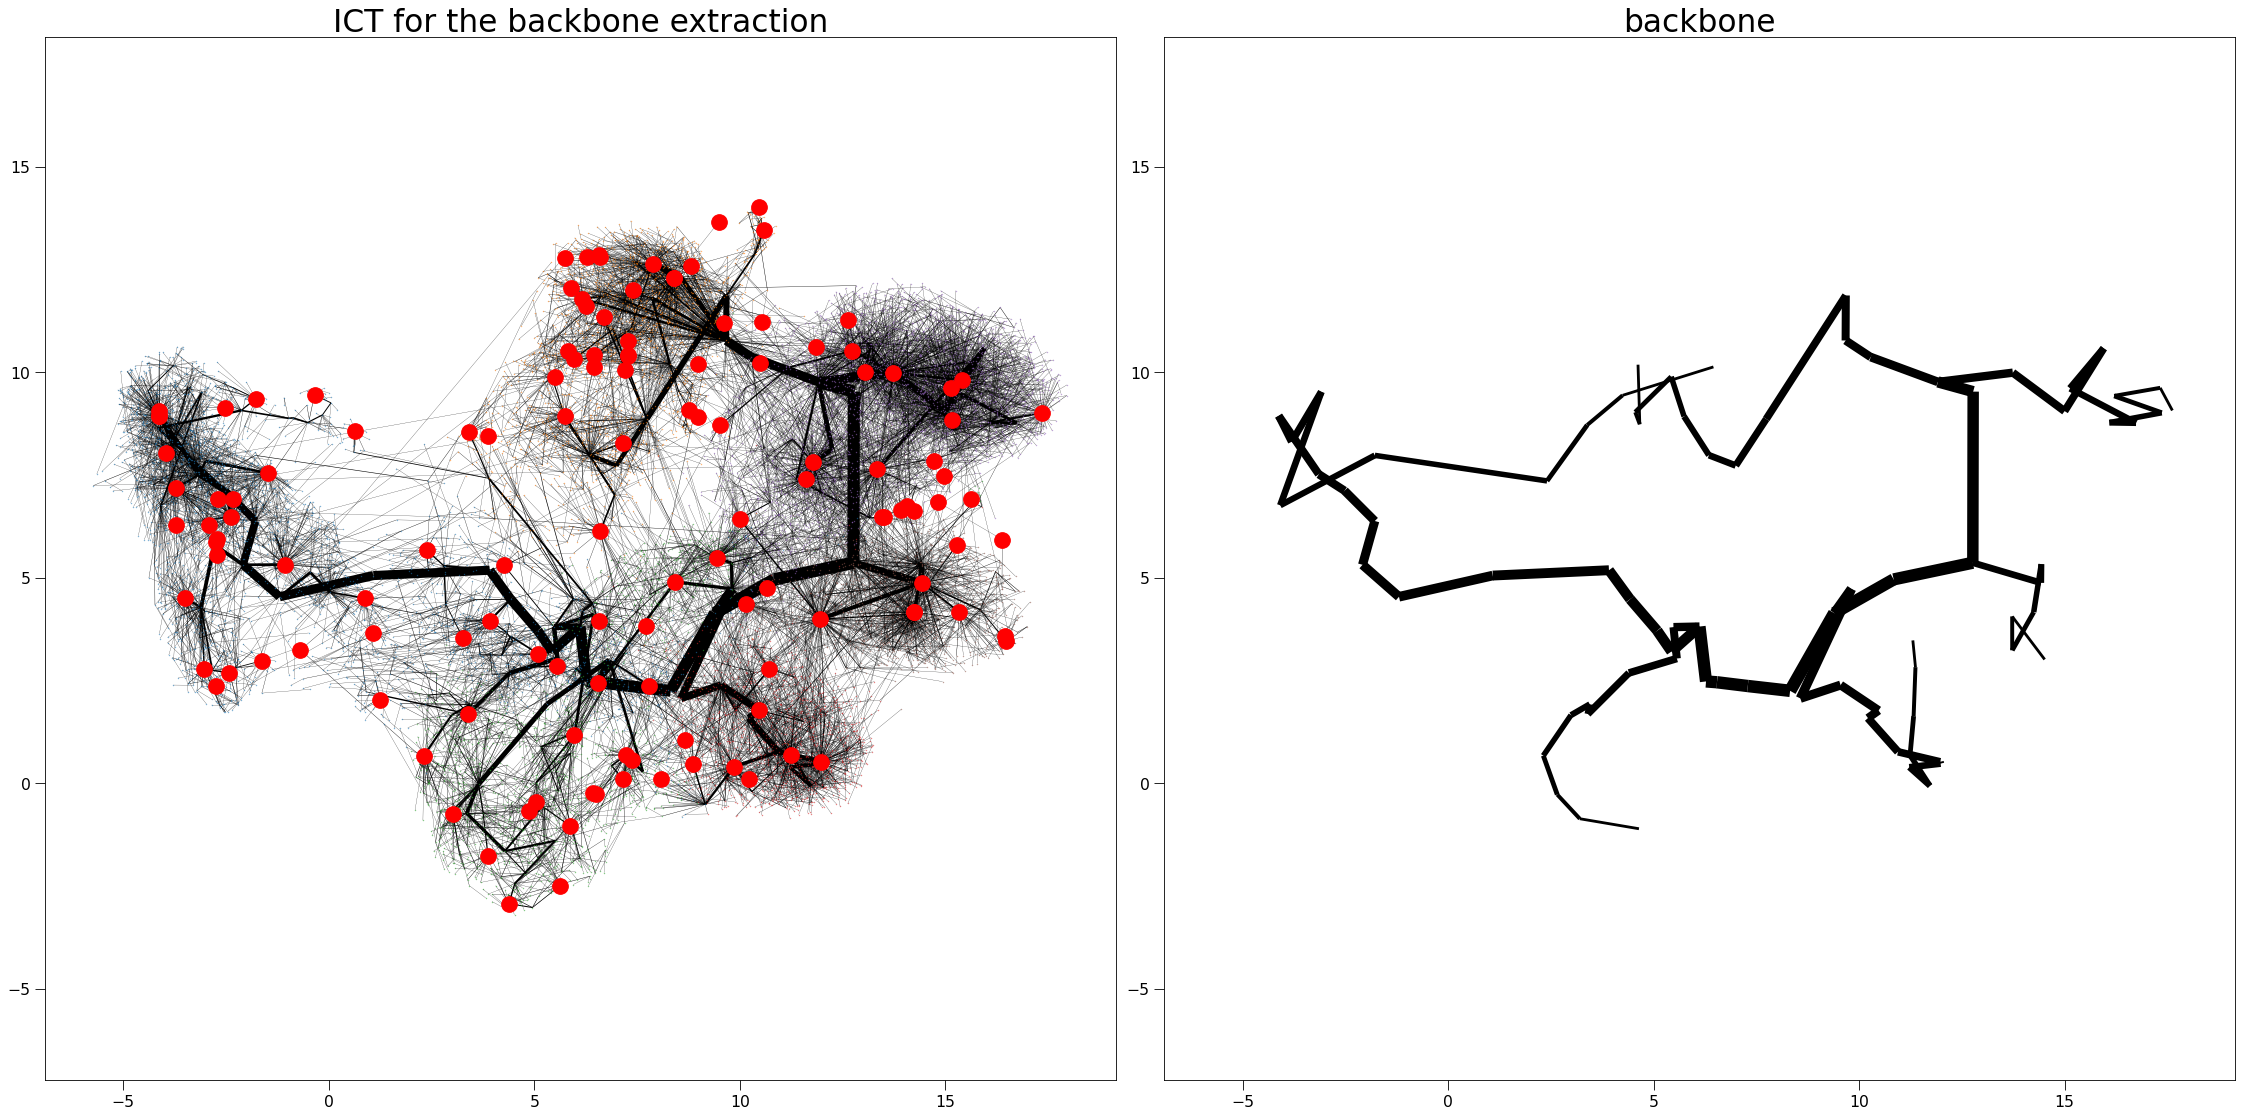

In [8]:
backbone, backbone_nodes = find_backbone(old_ICT, number_of_vertices=4)
backbone.indexEdges()

# Plot the ICT
fig, axs = plt.subplots(1, 2)
plot_points(embedding, f"", axs[0], labels=labels, node_size=0.5)
axs[0].get_legend().remove()
plot_graph(old_ICT, embedding, f"ICT for the backbone extraction", axs[0], cluster_centers=cluster_centers2, node_size=0)

plot_graph(backbone, embedding, f"backbone", axs[1], node_size=0)

plt.tight_layout()
plt.show()

/net/hcihome/storage/flernst/BT/External/clustering.py:308: RuntimeWarning: At least one ICT clusters was discarded!
  warnings.warn("At least one ICT clusters was discarded!" , RuntimeWarning)


sklearn is done: 83.61382222175598
My own part is done: 4.497851848602295


create edgeId array:   0%|          | 0/137992 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/137992 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

/net/hcihome/storage/flernst/BT/External/clustering.py:308: RuntimeWarning: At least one ICT clusters was discarded!
  warnings.warn("At least one ICT clusters was discarded!" , RuntimeWarning)
/net/hcihome/storage/flernst/BT/External/clustering.py:313: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 89.5270836353302
My own part is done: 2.963712215423584


create edgeId array:   0%|          | 0/137992 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/137992 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

/net/hcihome/storage/flernst/BT/External/clustering.py:308: RuntimeWarning: At least one ICT clusters was discarded!
  warnings.warn("At least one ICT clusters was discarded!" , RuntimeWarning)
/net/hcihome/storage/flernst/BT/External/clustering.py:313: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 82.01569724082947
My own part is done: 3.211334228515625


create edgeId array:   0%|          | 0/137992 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/137992 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

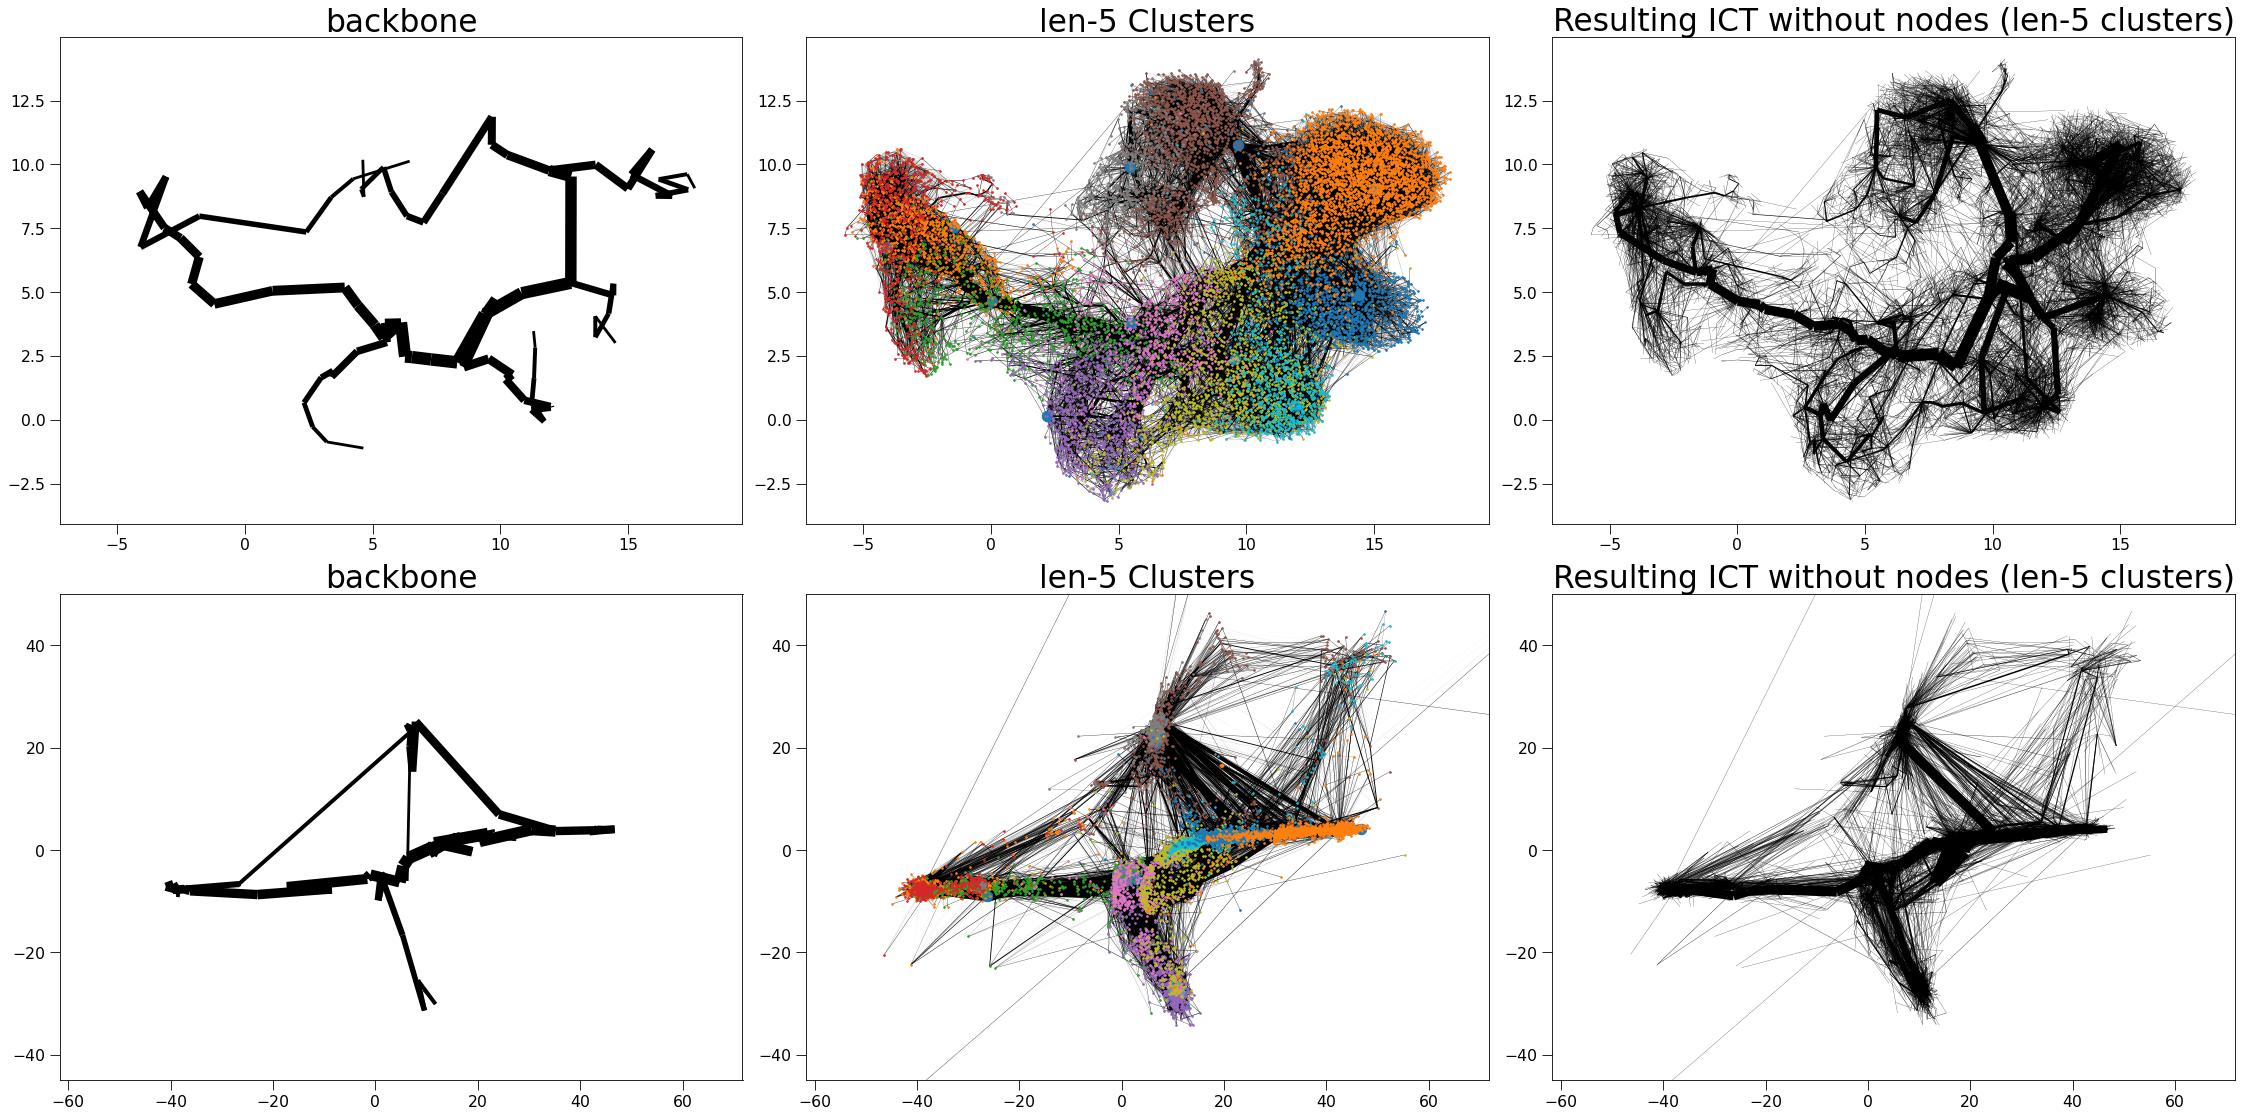

/net/hcihome/storage/flernst/BT/External/clustering.py:308: RuntimeWarning: At least one ICT clusters was discarded!
  warnings.warn("At least one ICT clusters was discarded!" , RuntimeWarning)
/net/hcihome/storage/flernst/BT/External/clustering.py:313: RuntimeWarning: Small clustersizes occure. Results might not be as expected!
  warnings.warn("Small clustersizes occure. Results might not be as expected!" , RuntimeWarning)


sklearn is done: 87.9241030216217
My own part is done: 4.170584678649902


create edgeId array:   0%|          | 0/137992 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/137992 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/13706 [00:00<?, ?it/s]

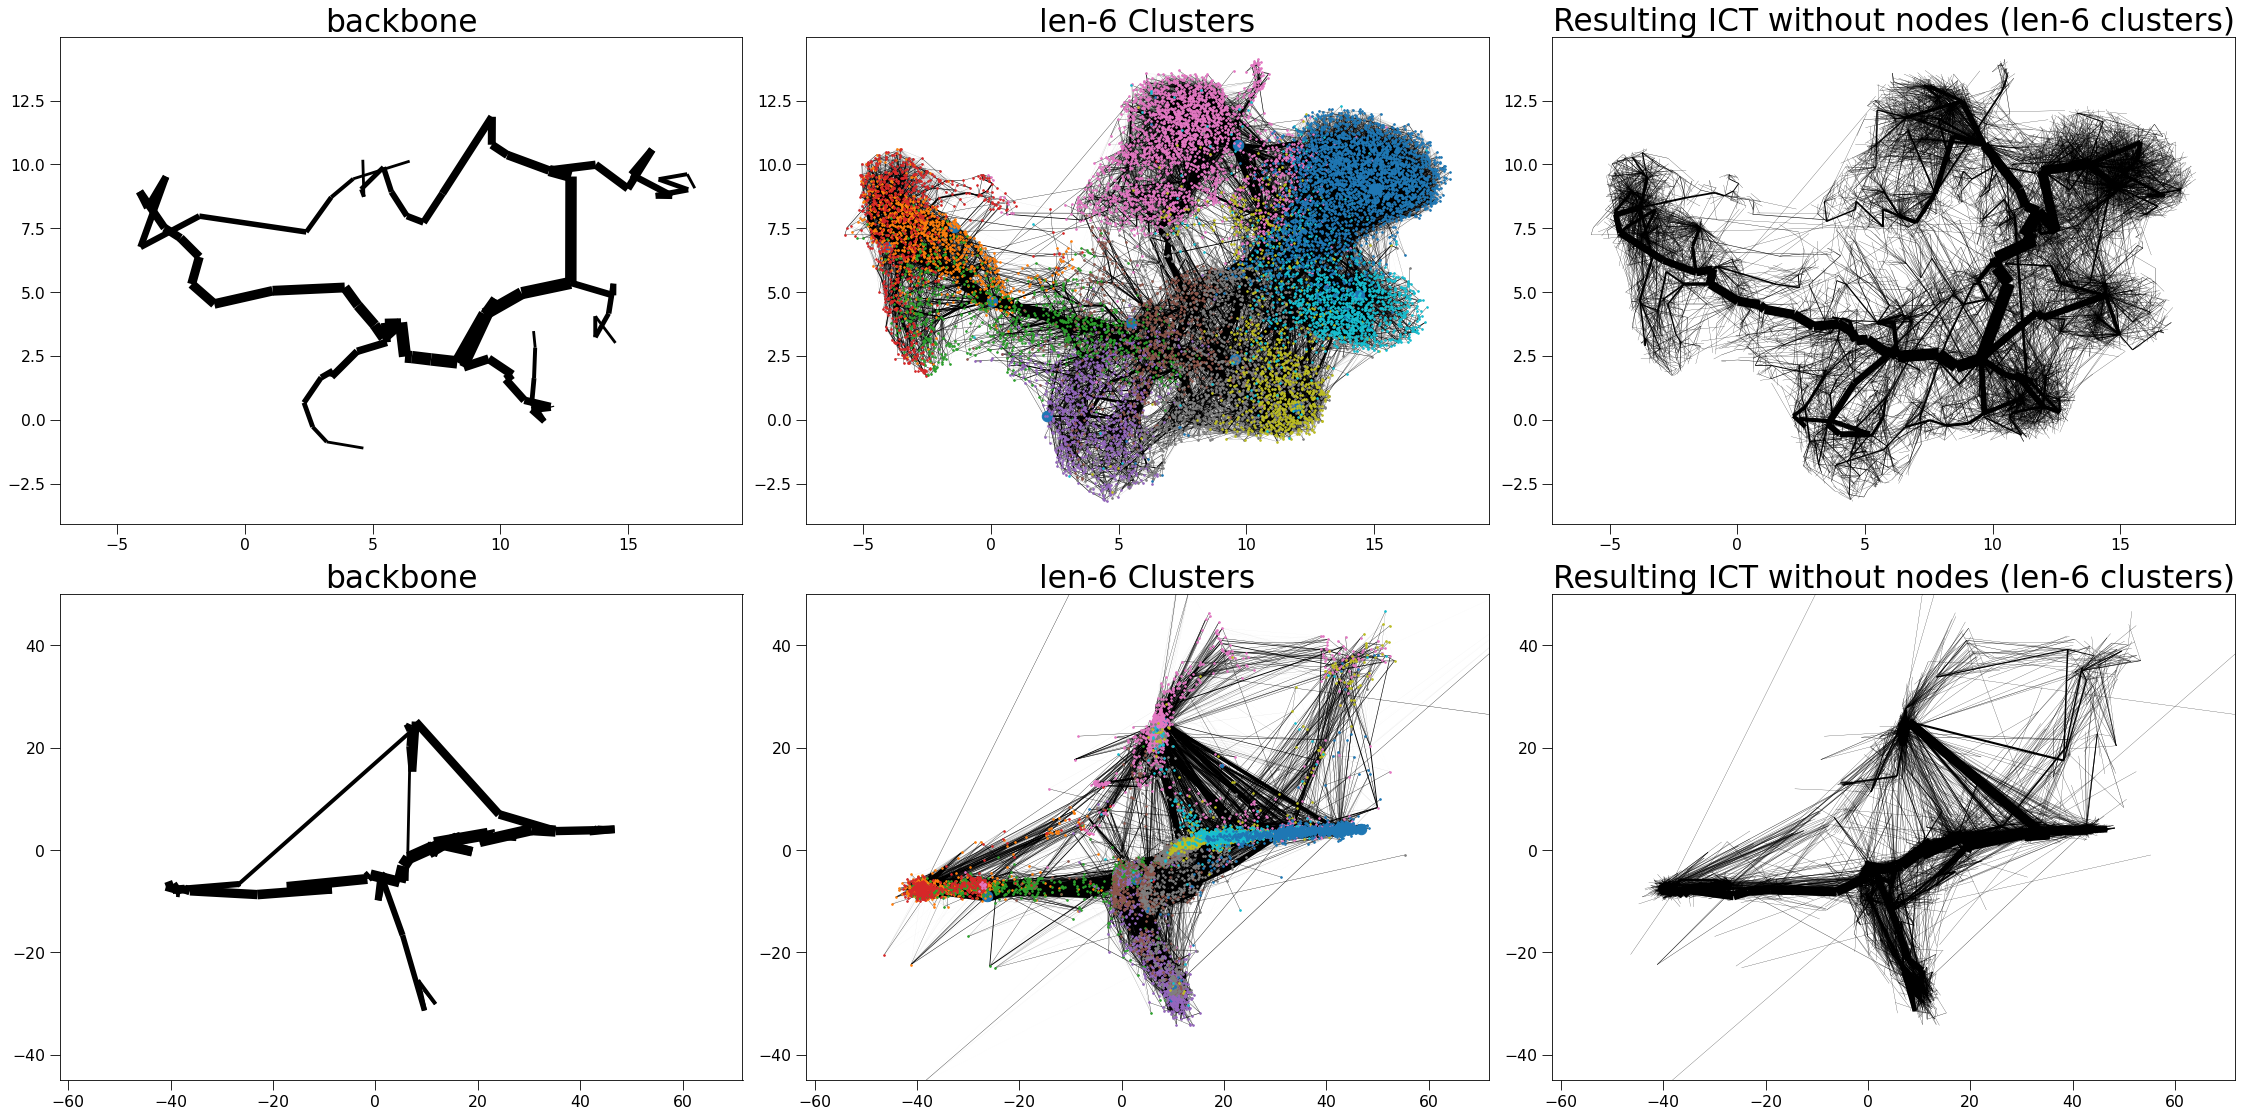

In [9]:
for k in range(3,7):
    
    G = deepcopy(old_G)
    cluster_centers, cluster_labels = ICT_clusters(old_ICT, pca, number_of_vertices=4, avg_cluster_len=k, log=False)

    cluster_centers, cluster_labels = cassign(cluster_centers, cluster_labels, pca, t=min_cluster_size)

    G = reweight_clusters(pca, G, cluster_centers, cluster_labels, min_scale = 0.3, max_scale=1.1)
    
    G.indexEdges()
    
    cluster_centers2 = centers(pca)
    
    ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers2, zeros_stay_zeros=True, update_G=1.1)
        
    ICT.indexEdges()
    
    # Plot the ICT
    fig, axs = plt.subplots(2, 3)
    
    plot_graph(backbone, embedding, f"backbone", axs[0,0], node_size=0)
    
    plot_graph(G, embedding, f"", axs[0,1], node_size=0)
    plot_points(embedding[cluster_centers], f"", axs[0,1], node_size=20)
    plot_points(embedding, f"len-{k} Clusters", axs[0,1], labels=np.array(cluster_labels), node_size=3)
    axs[0,1].get_legend().remove()
    
    
#     plot_points(embedding, f"", axs[0,2], labels=labels, node_size=0.5)
    plot_graph(ICT, embedding, f"Resulting ICT without nodes (len-{k} clusters)", axs[0,2], node_size=0)
    name = str(k)
    
    
    
    
    
    plot_graph(backbone, dtae_embedding, f"backbone", axs[1,0], node_size=0)
    
    plot_graph(G, dtae_embedding, f"", axs[1,1], node_size=0)
    plot_points(dtae_embedding[cluster_centers], f"", axs[1,1], node_size=20)
    plot_points(dtae_embedding, f"len-{k} Clusters", axs[1,1], labels=np.array(cluster_labels), node_size=3)
    axs[1,1].get_legend().remove()
    
    
#     plot_points(dtae_embedding, f"", axs[1,2], labels=dtae_labels, node_size=0.5)
    plot_graph(ICT, dtae_embedding, f"Resulting ICT without nodes (len-{k} clusters)", axs[1,2], node_size=0)
    name = str(k)
    
    axs[1,0].set_xlim([-50,60])
    axs[1,0].set_ylim([-45,50])
    axs[1,1].set_xlim([-50,60])
    axs[1,1].set_ylim([-45,50])
    axs[1,2].set_xlim([-50,60])
    axs[1,2].set_ylim([-45,50])
    
    
    plt.tight_layout()
    plt.savefig(f"Output/ETH/4-Vertex-pca-density/" + name.zfill(5) + ".png")
    plt.show()

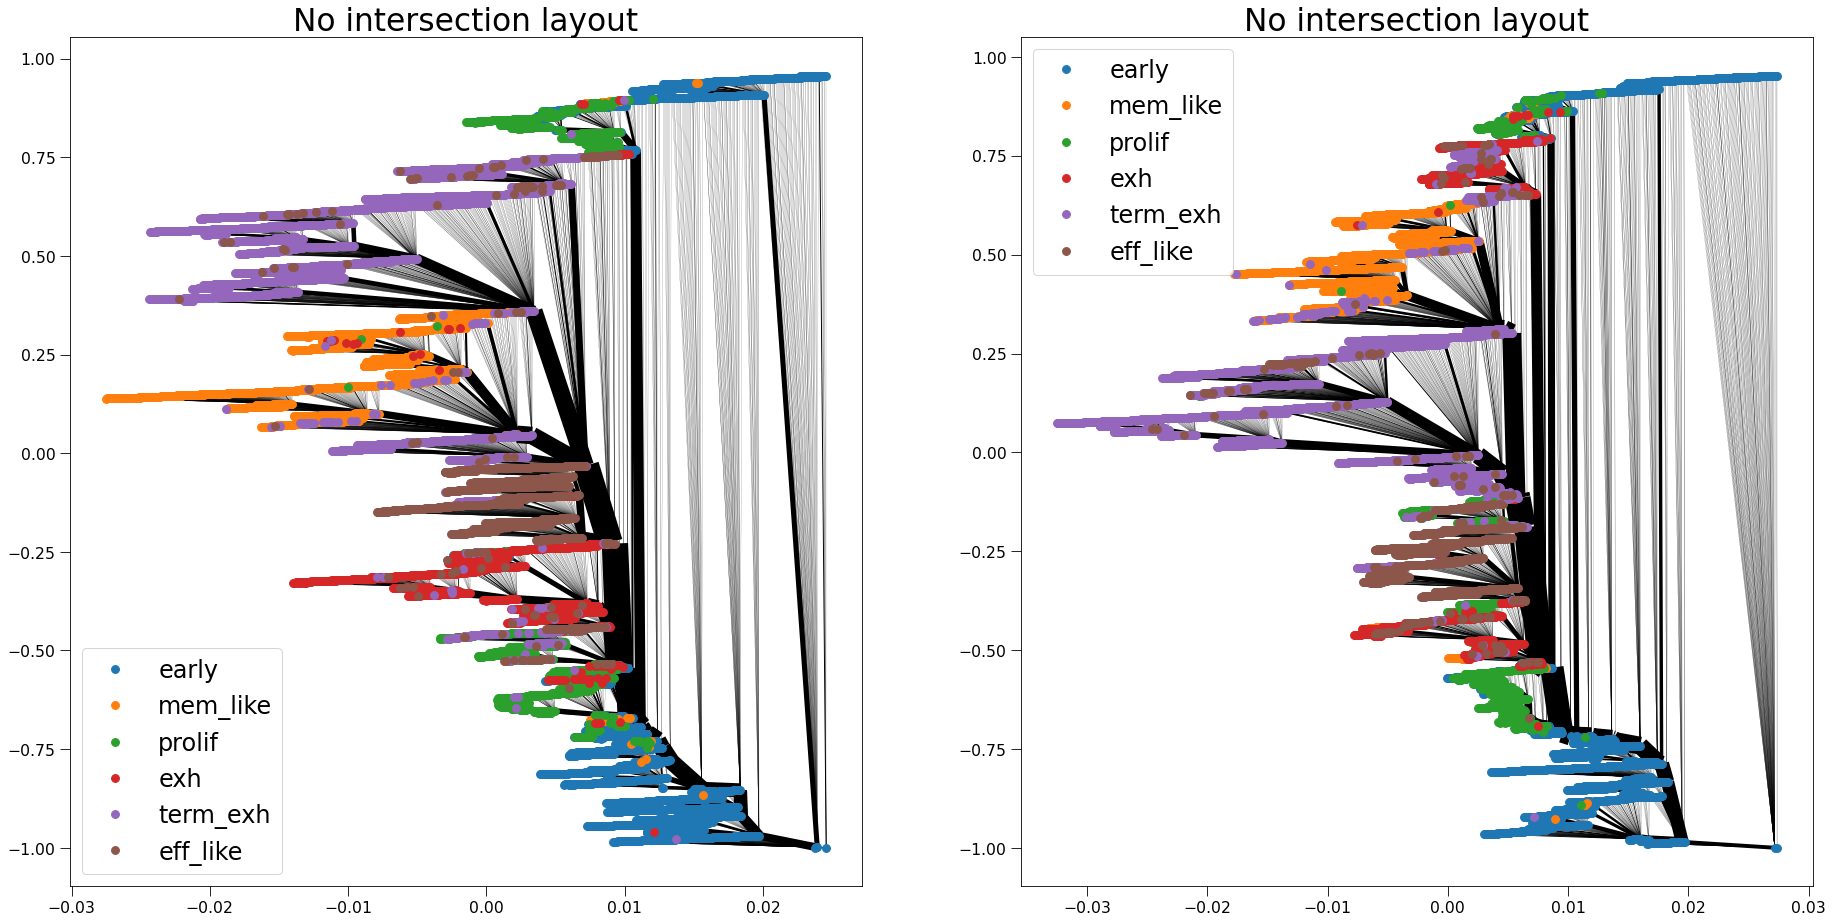

In [11]:
fig, axs = plt.subplots(1, 2)
no_intersections(old_ICT, position, ax=axs[0], labels=labels)
no_intersections(ICT, position, ax=axs[1], labels=labels)